In [1]:
phi = (1+sqrt(5))/2
ancho=8
library(repr)
options(repr.plot.width=ancho, repr.plot.height=round(ancho/phi))

In [2]:
library(docxtractr)

In [3]:
f <- read_docx(path = "E42_enarm_ra_2018.docx")

In [4]:
d <- docx_extract_tbl(docx = f,tbl_number = 1)
head(d)

"Médicos categoría mexicana sustentantes, seleccionados, promedio general por Facultad o Escuela de Medicina de procedencia XLII Examen Nacional para Aspirantes a Residencias Médicas 2018",NA,NA,NA,NA
,,,,
Entidad Federativa,Facultad oEscuela de Medicina,Sustentantes,Seleccionados,Promedio generalconocimientosmédicos
AGUASCALIENTES,UNIV. AUT. DE AGUASCALIENTES,265,100,67.93
AGUASCALIENTES,UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES,79,20,65.12
BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA",264,48,61.20
BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA",157,31,63.26


In [5]:
dim(d)

[1] 123   5

In [6]:
names(d) <- d[2,]
d <- d[3:dim(d)[1],]
names(d)[2] <- "Universidad"
names(d)[5] <- "PromedioGeneral"
head(d)

,Entidad Federativa,Universidad,Sustentantes,Seleccionados,PromedioGeneral
3,AGUASCALIENTES,UNIV. AUT. DE AGUASCALIENTES,265,100,67.93
4,AGUASCALIENTES,UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES,79,20,65.12
5,BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA",264,48,61.20
6,BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA",157,31,63.26
7,BAJA CALIFORNIA,UNIV. AUT. DE B.C. - CAMPUS VALLE DE LAS PALMAS,157,29,64.22
8,BAJA CALIFORNIA,"UNIV. AUT. DE B.C., U. ENSENADA",206,57,65.27


In [7]:
str(d)

'data.frame':	121 obs. of  5 variables:
 $ Entidad Federativa: chr  "AGUASCALIENTES" "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA" ...
 $ Universidad       : chr  "UNIV. AUT. DE AGUASCALIENTES" "UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES" "CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA" "CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA" ...
 $ Sustentantes      : chr  "265" "79" "264" "157" ...
 $ Seleccionados     : chr  "100" "20" "48" "31" ...
 $ PromedioGeneral   : chr  "67.93" "65.12" "61.20" "63.26" ...


In [8]:
chunkAsType <- function(d, columns,type=as.numeric){
    d[columns] <- lapply(d[columns],type)
    return(d)
}
d <- chunkAsType(d,c("Sustentantes","Seleccionados","PromedioGeneral"))
str(d)
head(d)

'data.frame':	121 obs. of  5 variables:
 $ Entidad Federativa: chr  "AGUASCALIENTES" "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA" ...
 $ Universidad       : chr  "UNIV. AUT. DE AGUASCALIENTES" "UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES" "CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA" "CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA" ...
 $ Sustentantes      : num  265 79 264 157 157 206 283 247 65 211 ...
 $ Seleccionados     : num  100 20 48 31 29 57 105 72 15 39 ...
 $ PromedioGeneral   : num  67.9 65.1 61.2 63.3 64.2 ...


,Entidad Federativa,Universidad,Sustentantes,Seleccionados,PromedioGeneral
3,AGUASCALIENTES,UNIV. AUT. DE AGUASCALIENTES,265,100,67.93
4,AGUASCALIENTES,UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES,79,20,65.12
5,BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA",264,48,61.20
6,BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA",157,31,63.26
7,BAJA CALIFORNIA,UNIV. AUT. DE B.C. - CAMPUS VALLE DE LAS PALMAS,157,29,64.22
8,BAJA CALIFORNIA,"UNIV. AUT. DE B.C., U. ENSENADA",206,57,65.27


In [38]:
library(MASS)
sum(d$Seleccionados)
sum(d$Sustentantes)
fractions(sum(d$Seleccionados)/sum(d$Sustentantes))
fractions(0.20)
fractions(0.3)

[1] 8333

[1] 40081

[1] 5024/24165

[1] 1/5

[1] 3/10

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1181  0.1797  0.1878  0.2404  0.7872 

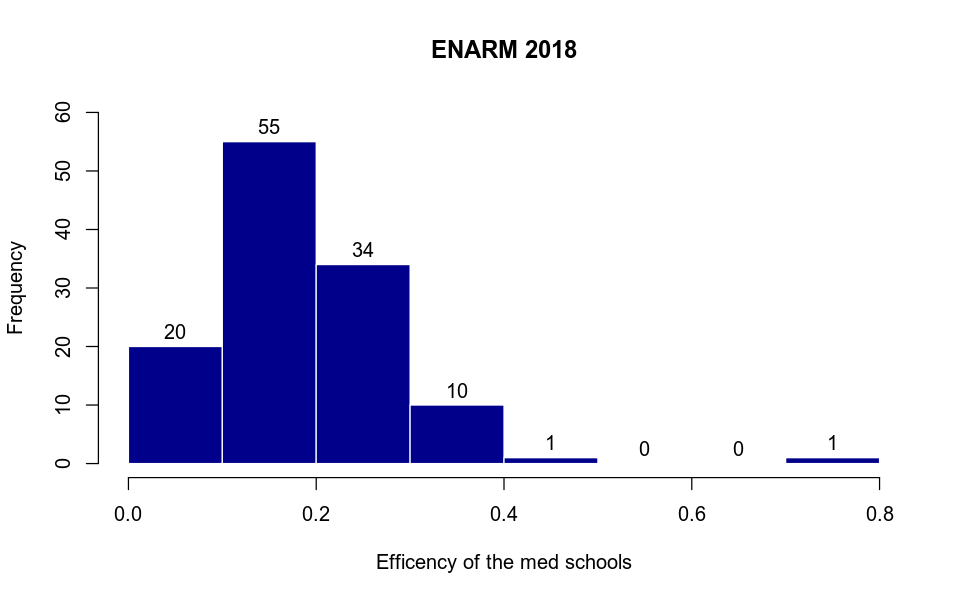

In [36]:
efi <- d$Seleccionados / d$Sustentantes
summary(efi)
hist(efi,xlab = "Efficency of the med schools" ,main="ENARM 2018",
     border = F, col = "darkblue",labels = T,ylim = c(0,60))

In [37]:
png(filename = "fig-01.png",width = ancho, height = ancho/phi,units = "in", res = 600)
hist(efi,xlab = "Efficency of the med schools" ,main="ENARM 2018",
     border = F, col = "darkblue",labels = T,ylim = c(0,60))
dev.off()

png 
  2

In [11]:
tercerquartil <- summary(efi)[[5]]
tercerquartil

[1] 0.2403846

In [12]:
d <- cbind(d,efi)
head(d)

,Entidad Federativa,Universidad,Sustentantes,Seleccionados,PromedioGeneral,efi
3,AGUASCALIENTES,UNIV. AUT. DE AGUASCALIENTES,265,100,67.93,0.3773585
4,AGUASCALIENTES,UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES,79,20,65.12,0.2531646
5,BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA",264,48,61.20,0.1818182
6,BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA",157,31,63.26,0.1974522
7,BAJA CALIFORNIA,UNIV. AUT. DE B.C. - CAMPUS VALLE DE LAS PALMAS,157,29,64.22,0.1847134
8,BAJA CALIFORNIA,"UNIV. AUT. DE B.C., U. ENSENADA",206,57,65.27,0.2766990


In [44]:
best <- d[d$efi >= tercerquartil,]
best <- best [order(best$efi,decreasing = T),]
head(best,10)

,Entidad Federativa,Universidad,Sustentantes,Seleccionados,PromedioGeneral,efi,ispublic
31,CIUDAD DE MÉXICO,UNIV. PANAMERICANA,47,37,76.70,0.7872340,private
90,SAN LUIS POTOSÍ,UNIV. AUT. DE SAN LUIS POTOSÍ,228,92,70.09,0.4035088,public
3,AGUASCALIENTES,UNIV. AUT. DE AGUASCALIENTES,265,100,67.93,0.3773585,public
9,BAJA CALIFORNIA,"UNIV. AUT. DE B.C., U. MEXICALI",283,105,67.95,0.3710247,public
34,COAHUILA,"UNIV. AUT. DE COAHUILA, U. TORREÓN",178,66,68.43,0.3707865,public
33,COAHUILA,"UNIV. AUT. DE COAHUILA, U. SALTILLO",123,45,69.27,0.3658537,public
75,NUEVO LEÓN,INST. TECNOLÓGICO EST. SUP. MTY.,255,89,70.75,0.3490196,private
30,CIUDAD DE MÉXICO,UNIV. LA SALLE,376,126,69.22,0.3351064,private
76,NUEVO LEÓN,UNIV. AUT. DE NUEVO LEÓN,1428,448,66.04,0.3137255,public
58,JALISCO,UNIV. DE GUADALAJARA,1564,489,66.18,0.3126598,public



Call:
lm(formula = d$efi ~ d$PromedioGeneral)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13685 -0.02629 -0.00194  0.02269  0.28490 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.147699   0.068783  -16.69   <2e-16 ***
d$PromedioGeneral  0.021513   0.001106   19.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04981 on 119 degrees of freedom
Multiple R-squared:  0.7609,	Adjusted R-squared:  0.7589 
F-statistic: 378.6 on 1 and 119 DF,  p-value: < 2.2e-16


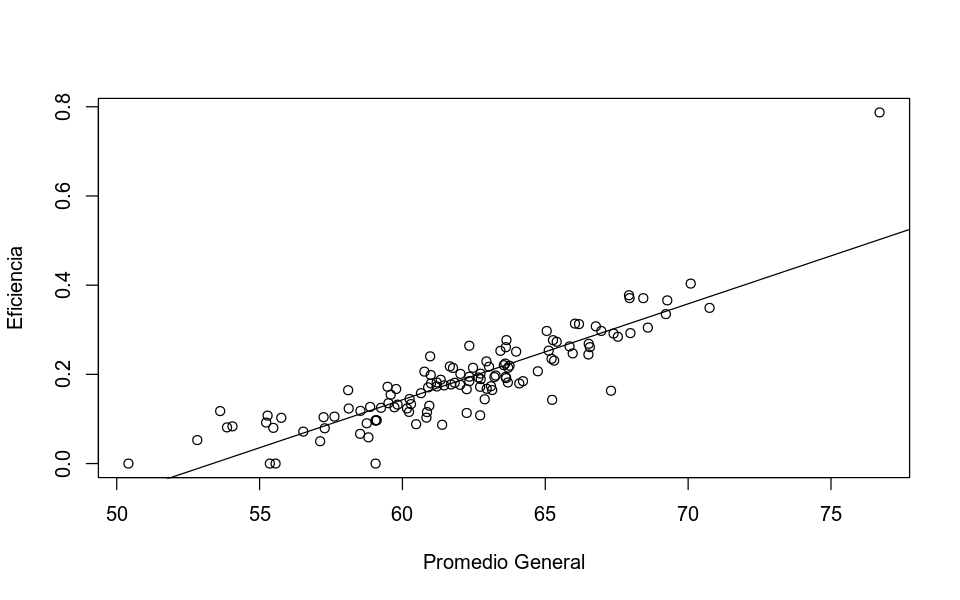

In [14]:
m <- lm( d$efi ~ d$PromedioGeneral )
summary(m)
plot(d$efi ~ d$PromedioGeneral,ylab = "Eficiencia", xlab = "Promedio General")
abline(m$coefficients[1],m$coefficients[2])

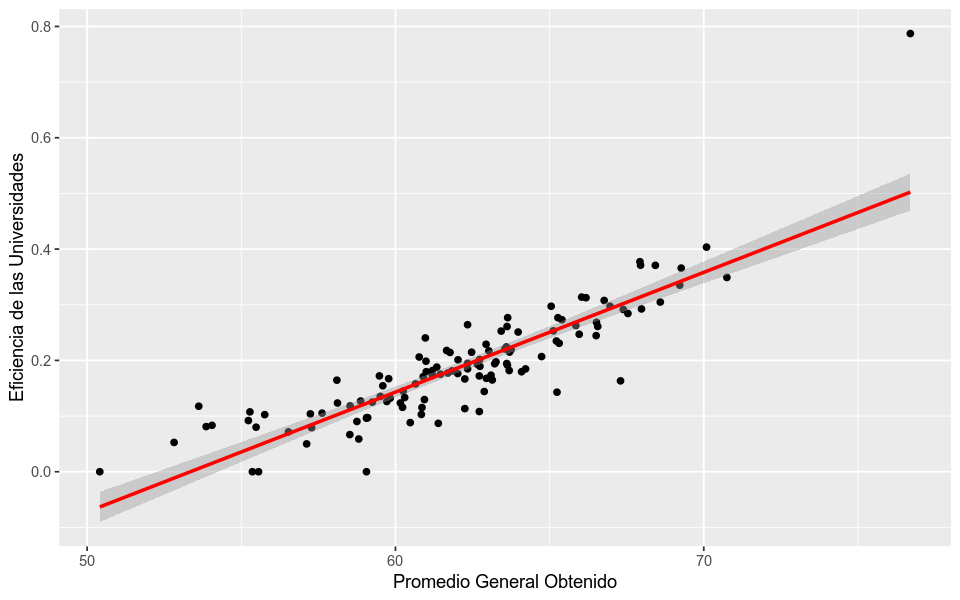

In [15]:
library(ggplot2)
g <- ggplot(d, aes(x = PromedioGeneral, y = efi)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")+labs(y="Eficiencia de las Universidades",x="Promedio General Obtenido")
g

In [16]:
png(filename = "fig-02.png",width = ancho, height = ancho/phi,units = "in", res = 600)
g
dev.off()

png 
  2

In [17]:
dim(d)
str(d)

[1] 121   6

'data.frame':	121 obs. of  6 variables:
 $ Entidad Federativa: chr  "AGUASCALIENTES" "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA" ...
 $ Universidad       : chr  "UNIV. AUT. DE AGUASCALIENTES" "UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES" "CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA" "CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA" ...
 $ Sustentantes      : num  265 79 264 157 157 206 283 247 65 211 ...
 $ Seleccionados     : num  100 20 48 31 29 57 105 72 15 39 ...
 $ PromedioGeneral   : num  67.9 65.1 61.2 63.3 64.2 ...
 $ efi               : num  0.377 0.253 0.182 0.197 0.185 ...


In [18]:
ispublic <- vector(mode = "character",length = dim(d)[1])
d <- cbind(d,ispublic)
d <- chunkAsType(d,"ispublic",as.character)
str(d)

'data.frame':	121 obs. of  7 variables:
 $ Entidad Federativa: chr  "AGUASCALIENTES" "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA" ...
 $ Universidad       : chr  "UNIV. AUT. DE AGUASCALIENTES" "UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES" "CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA" "CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA" ...
 $ Sustentantes      : num  265 79 264 157 157 206 283 247 65 211 ...
 $ Seleccionados     : num  100 20 48 31 29 57 105 72 15 39 ...
 $ PromedioGeneral   : num  67.9 65.1 61.2 63.3 64.2 ...
 $ efi               : num  0.377 0.253 0.182 0.197 0.185 ...
 $ ispublic          : chr  "" "" "" "" ...


In [19]:
d[grep(pattern = "AUT",d$Universidad),"ispublic"] <- "public"
d[grep(pattern = "IPN",d$Universidad),"ispublic"] <- "public"
d[grep(pattern = "UNAM",d$Universidad),"ispublic"] <- "public"
d[grep(pattern = "SEDENA",d$Universidad),"ispublic"] <- "public"
d[grep(pattern = "UNIV. DE COLIMA",d$Universidad),"ispublic"] <- "public"
d[grep(pattern = "UNIV. VERACRUZANA",d$Universidad),"ispublic"] <- "public"
d[grep(pattern = "UNIV. DE SONORA",d$Universidad),"ispublic"] <- "public"
d[grep(pattern = "UNIV. DE GUADALAJARA",d$Universidad),"ispublic"] <- "public"

head(d)
str(d)

,Entidad Federativa,Universidad,Sustentantes,Seleccionados,PromedioGeneral,efi,ispublic
3,AGUASCALIENTES,UNIV. AUT. DE AGUASCALIENTES,265,100,67.93,0.3773585,public
4,AGUASCALIENTES,UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES,79,20,65.12,0.2531646,
5,BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA",264,48,61.20,0.1818182,
6,BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA",157,31,63.26,0.1974522,
7,BAJA CALIFORNIA,UNIV. AUT. DE B.C. - CAMPUS VALLE DE LAS PALMAS,157,29,64.22,0.1847134,public
8,BAJA CALIFORNIA,"UNIV. AUT. DE B.C., U. ENSENADA",206,57,65.27,0.2766990,public


'data.frame':	121 obs. of  7 variables:
 $ Entidad Federativa: chr  "AGUASCALIENTES" "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA" ...
 $ Universidad       : chr  "UNIV. AUT. DE AGUASCALIENTES" "UNIV. CUAUHTEMOC - CAMPUS AGUASCALIENTES" "CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA" "CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA" ...
 $ Sustentantes      : num  265 79 264 157 157 206 283 247 65 211 ...
 $ Seleccionados     : num  100 20 48 31 29 57 105 72 15 39 ...
 $ PromedioGeneral   : num  67.9 65.1 61.2 63.3 64.2 ...
 $ efi               : num  0.377 0.253 0.182 0.197 0.185 ...
 $ ispublic          : chr  "public" "" "" "" ...


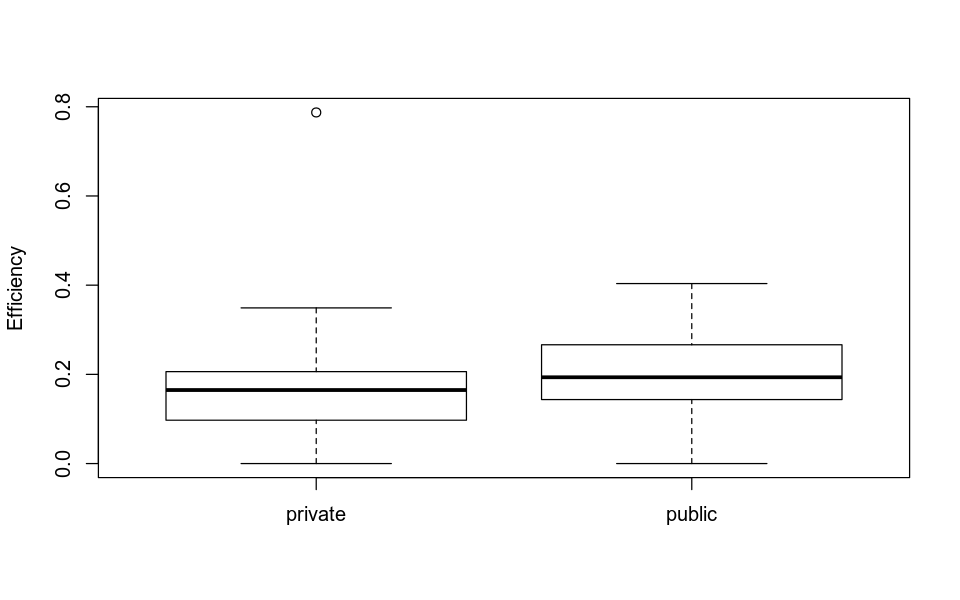

In [41]:
d[d$ispublic=="","ispublic"] <- "private"
d <- chunkAsType(d,"ispublic",as.factor)
boxplot(d$efi ~ d$ispublic, ylab="Efficiency" )

In [39]:
summary(d$ispublic)

private  public 
     61      60

In [42]:
png(filename = "fig-03.png",width = ancho, height = ancho/phi,units = "in", res = 600)
boxplot(d$efi ~ d$ispublic , ylab="Efficiency" )
dev.off()

png 
  2